In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

## Importation des bases de données
Toutes les bases de données peuvent être téléchargées sur le lien suivant:
https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data


In [3]:
train_data=pd.read_csv('sales_train.csv')
#,index_col='date',parse_dates=True

In [3]:
test_data=pd.read_csv("test.csv")
shops_data=pd.read_csv("shops.csv")
items_data=pd.read_csv("items.csv")
items_cat_data=pd.read_csv("item_categories.csv")

In [4]:
train_data.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [5]:
train_data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [ ]:
#train_data=train_data.dropna(axis=0)

In [6]:
train_data.shape

(2935849, 6)

In [6]:
train_data.sort_values(by=['date','shop_id'],inplace=True)
# ['date'],inplace=True pour modifier le dataframe

In [6]:
train_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [7]:
monthly_sales=train_data.groupby(["date_block_num","shop_id","item_id"])[
    "date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

<ipython-input-7-c52e26f3048d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly_sales=train_data.groupby(["date_block_num","shop_id","item_id"])[


KeyboardInterrupt: 

On peut observer le nombre de produits vendus par mois 

In [10]:
monthly_sales

date             item_price item_cnt_day
                                       min         max       mean          sum
date_block_num shop_id item_id                                                
0              0       32       03.01.2013  31.01.2013      221.0          6.0
                       33       03.01.2013  28.01.2013      347.0          3.0
                       35       31.01.2013  31.01.2013      247.0          1.0
                       43       31.01.2013  31.01.2013      221.0          1.0
                       51       13.01.2013  31.01.2013      128.5          2.0
...                                    ...         ...        ...          ...
33             59      22087    05.10.2015  23.10.2015      119.0          6.0
                       22088    03.10.2015  27.10.2015      119.0          2.0
                       22091    03.10.2015  03.10.2015      179.0          1.0
                       22100    18.10.2015  18.10.2015      629.0          1.0
                       22102    16.10.2015  16.10.2015     1250.0          1.0

[1609124 rows x 4 columns]

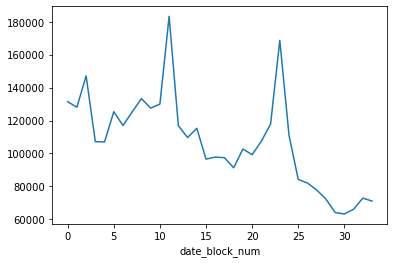

In [11]:
sales_by_month = train_data.groupby(['date_block_num'])['item_cnt_day'].sum()
sales_by_month.plot()
#on peut voir qu'il y a plus de vente le 11eme mois et le 23eme mois, c'est a dire en décembre 2013 et en décembre 2014
#(les dates commencent a partir de 0)

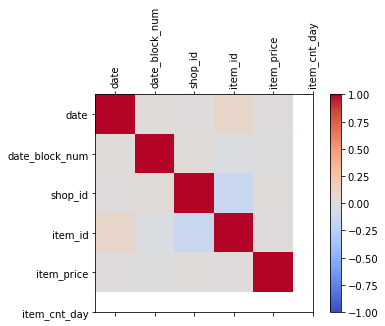

In [7]:
corr = train_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(train_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns)
ax.set_yticklabels(train_data.columns)
plt.show()

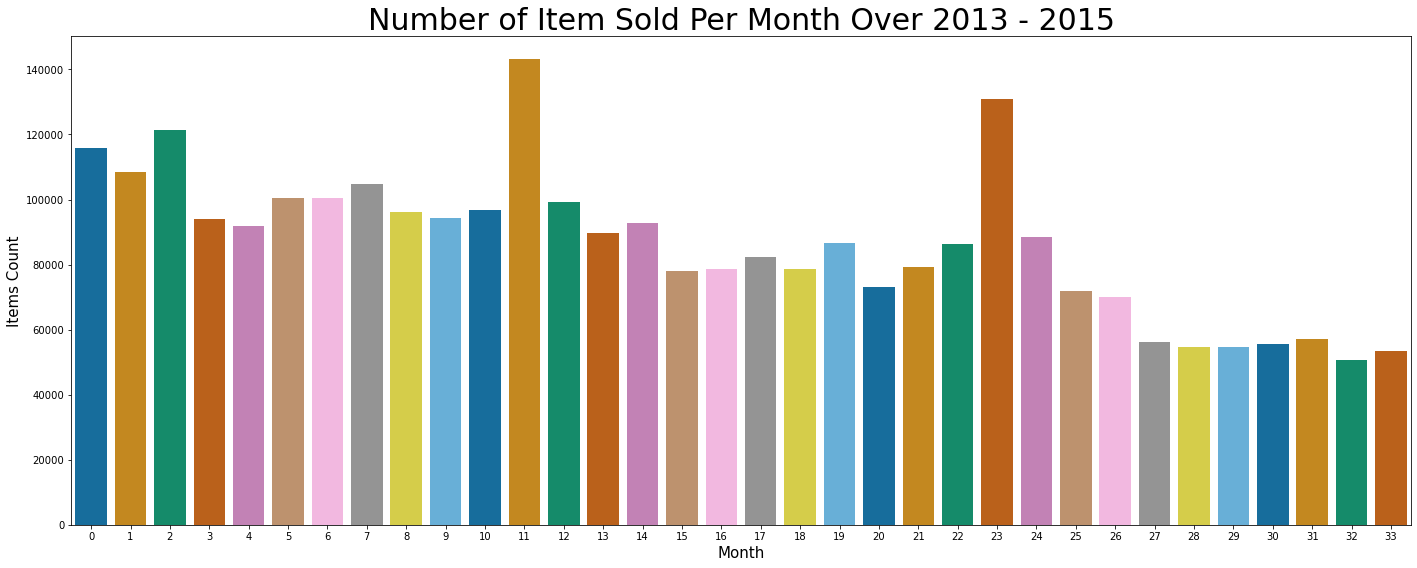

In [12]:
plt.rcParams['figure.figsize'] = (24, 9)
sns.countplot(train_data['date_block_num'], palette = 'colorblind')
plt.title('Number of Item Sold Per Month Over 2013 - 2015', fontsize = 30)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Items Count', fontsize = 15)
plt.show()


In [9]:
items_data.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [11]:
print(items_cat_data['item_category_name'].nunique())
print(shops_data['shop_name'].nunique())

84
60


In [5]:
train_data['date'] = pd.to_datetime(train_data['date'], errors='coerce')

In [6]:
days = []
months = []
years = []

for day in train_data['date']:
    days.append(day.day)
for month in train_data['date']:
    months.append(month.month)    
for year in train_data['date']:
    years.append(year.year)

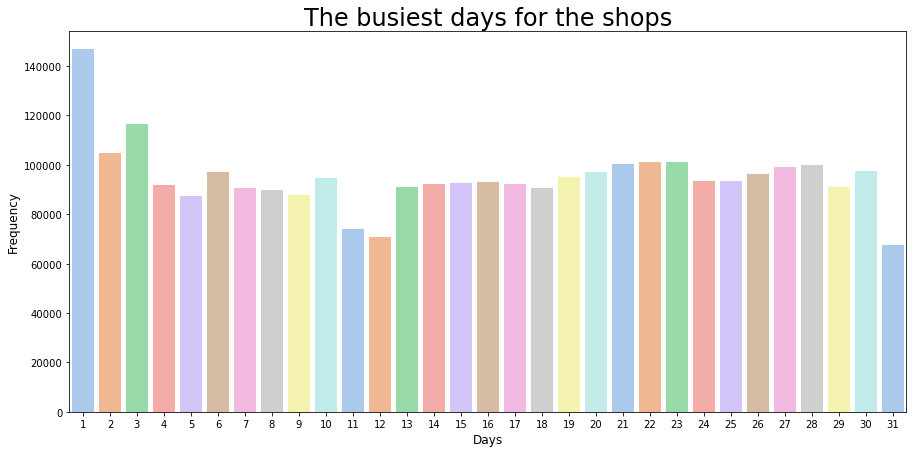

In [16]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(days, palette= 'pastel')
plt.title('The busiest days for the shops', fontsize = 24)
plt.xlabel('Days', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.show()

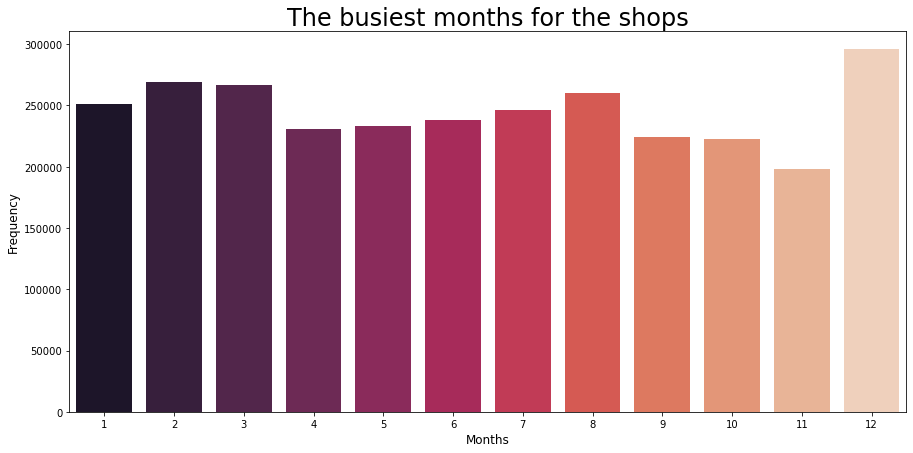

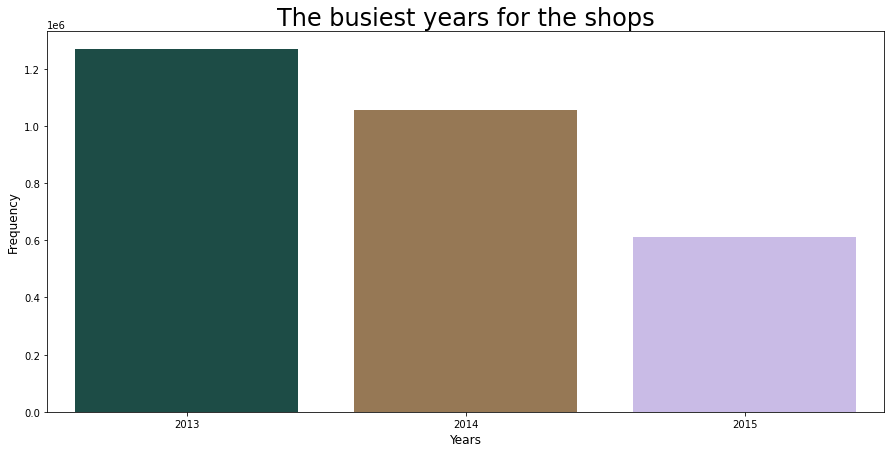

In [17]:
# busy month
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(months, palette= 'rocket')
plt.title('The busiest months for the shops', fontsize = 24)
plt.xlabel('Months', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.show()

# busy year
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(years, palette= 'cubehelix')
plt.title('The busiest years for the shops', fontsize = 24)
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)

plt.show()

In [7]:
train_data['day'] = days
train_data['month'] = months
train_data['year'] = years

In [8]:
train_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,2013-02-01,0,59,22154,999.00,1.0,1,2,2013
1,2013-03-01,0,25,2552,899.00,1.0,1,3,2013
2,2013-05-01,0,25,2552,899.00,-1.0,1,5,2013
3,2013-06-01,0,25,2554,1709.05,1.0,1,6,2013
4,2013-01-15,0,25,2555,1099.00,1.0,15,1,2013
...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,10,10,2015
2935845,2015-09-10,33,25,7460,299.00,1.0,10,9,2015
2935846,2015-10-14,33,25,7459,349.00,1.0,14,10,2015
2935847,2015-10-22,33,25,7440,299.00,1.0,22,10,2015


#### Nettoyage de la base de données

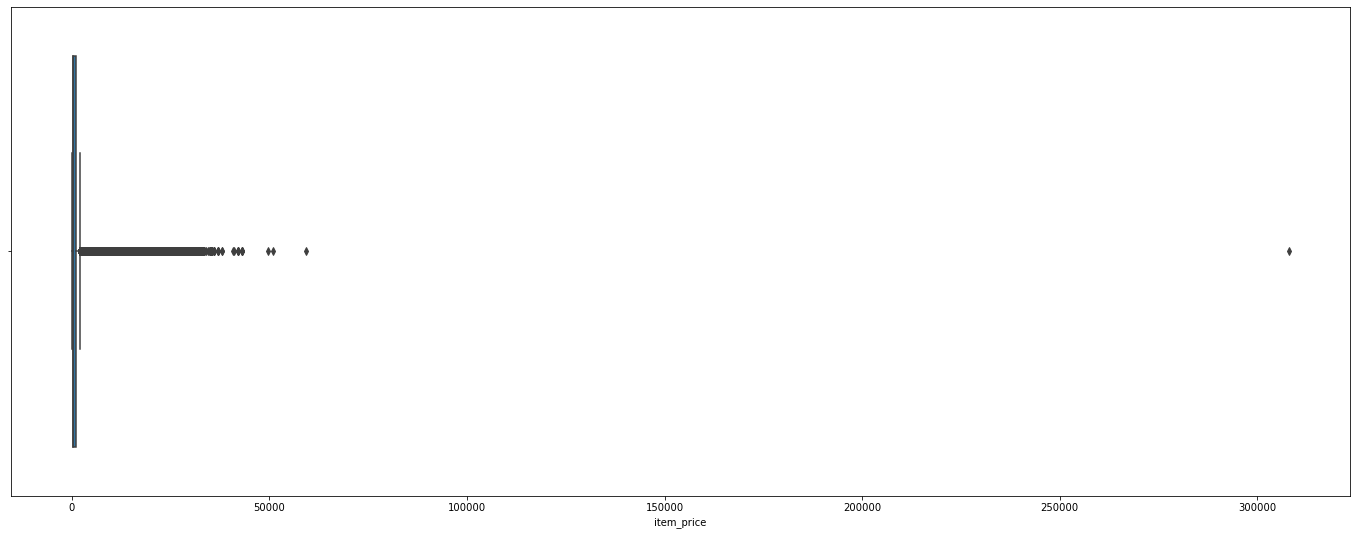

In [15]:
sns.boxplot(x=train_data['item_price'],orient="y")
#plt.show()
#nous constatons un point complètement éloigné des autres, il est potentiellement atypique

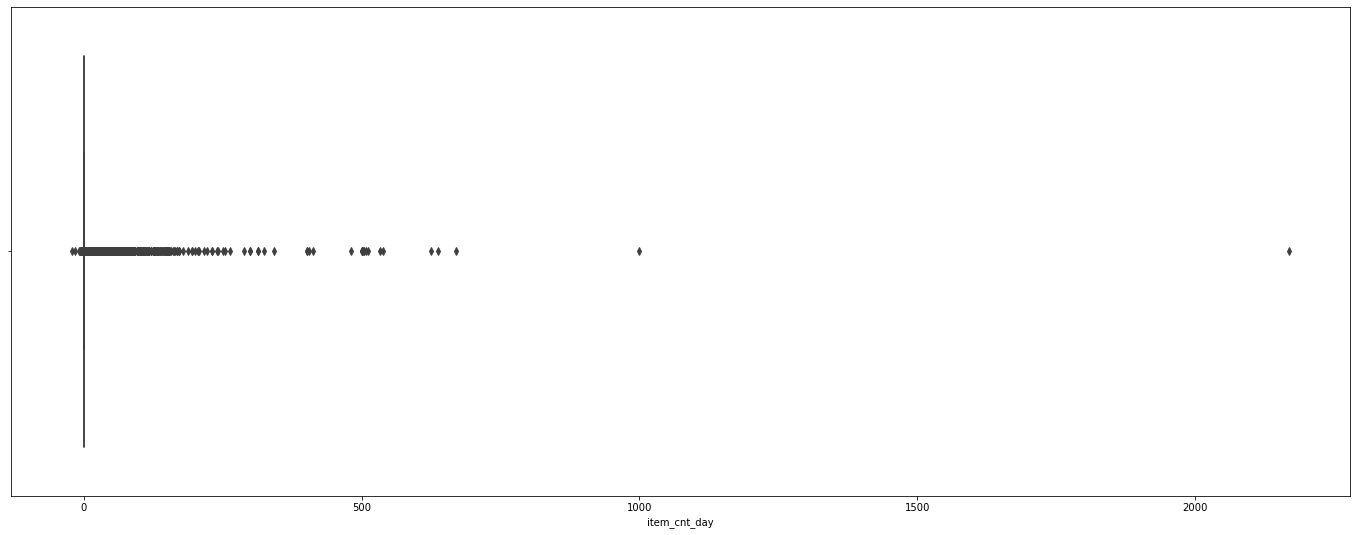

In [14]:
sns.boxplot(x=train_data['item_cnt_day'],orient="y")

In [21]:
train_data.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,1.566783e+01,6.432552e+00,2.013777e+03
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,9.128682e+00,3.504695e+00,7.684790e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,1.000000e+00,1.000000e+00,2.013000e+03
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,7.000000e+00,3.000000e+00,2.013000e+03
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,1.600000e+01,6.000000e+00,2.014000e+03
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,2.400000e+01,9.000000e+00,2.014000e+03
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,3.100000e+01,1.200000e+01,2.015000e+03


In [9]:
train_data = train_data[train_data['item_price'] < 80000]
train_data = train_data[train_data['item_cnt_day'] < 1500]

In [23]:
train_data.shape

(2935847, 9)

In [10]:
train_data[train_data['item_price'] < 0]
#on voit des prix négatifs, ce qui signifie que c'est un retour surement, on va les supprimer de la base 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
484683,2013-05-15,4,32,2973,-1.0,1.0,15,5,2013


In [11]:
train_data=train_data[train_data['item_price'] > 0]

In [12]:
train_data[train_data['item_cnt_day'] < 0]
#on a enormement de produits retournées aux magasins. si les produits ont été retournés ça veut dire qu'il n'y a pas eu de vente, 
#alors nous pouvons les supprimer de la base

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
2,2013-05-01,0,25,2552,899.0,-1.0,1,5,2013
148,2013-01-23,0,25,2321,999.0,-1.0,23,1,2013
175,2013-07-01,0,25,2199,1449.0,-1.0,1,7,2013
807,2013-02-01,0,25,2330,599.0,-1.0,1,2,2013
1041,2013-01-13,0,25,5034,1989.0,-1.0,13,1,2013
...,...,...,...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0,26,10,2015
2934462,2015-10-18,33,25,4896,6398.0,-1.0,18,10,2015
2935263,2015-05-10,33,25,10039,249.0,-1.0,10,5,2015
2935643,2015-10-16,33,25,7893,2990.0,-1.0,16,10,2015


In [13]:
train_data=train_data[train_data['item_cnt_day'] > 0]

In [14]:
train_data.shape

(2928490, 9)

In [ ]:
#Prediction

In [ ]:
#LIGHTGBM regression

In [2]:
conda install lightgbm


Note: you may need to restart the kernel to use updated packages.



EnvironmentLocationNotFound: Not a conda environment: C:\Users\BIKEYE



In [12]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


'C:\Users\BIKEYE' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [23]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from lightgbm import LGBMRegressor

ModuleNotFoundError: No module named 'lightgbm'

In [10]:
from lightgbm import LGBMRegressor


ModuleNotFoundError: No module named 'lightgbm'

In [6]:
pip install cmake

Note: you may need to restart the kernel to use updated packages.


'C:\Users\BIKEYE' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [18]:
pip install gcc

Note: you may need to restart the kernel to use updated packages.


'C:\Users\BIKEYE' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [21]:
print(gcc.__version__)

NameError: name 'gcc' is not defined

In [7]:
pip install libomp

Note: you may need to restart the kernel to use updated packages.


'C:\Users\BIKEYE' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [8]:
git clone --recursive https://github.com/microsoft/LightGBM
cd LightGBM
mkdir build
cd build
cmake ..
make -j4

SyntaxError: invalid syntax (<ipython-input-8-2dd7fc274399>, line 1)

In [9]:
git clone --recursive https://github.com/microsoft/LightGBM
cd LightGBM
mkdir build
cd build
cmake -G "MinGW Makefiles" ..
mingw32-make.exe -j4

SyntaxError: invalid syntax (<ipython-input-9-0e9fdff29126>, line 1)

In [25]:
train_dataset = data.copy()
train_dataset

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-01-01,0,2,11828,1699.0,1.0
2013-01-01,0,2,12134,299.0,1.0
2013-01-01,0,2,6916,999.5,1.0
2013-01-01,0,2,8665,299.0,1.0
2013-01-01,0,2,8712,198.0,1.0
...,...,...,...,...,...
2015-12-10,33,59,7723,2099.0,1.0
2015-12-10,33,59,4478,1199.0,1.0
2015-12-10,33,59,4251,249.0,1.0


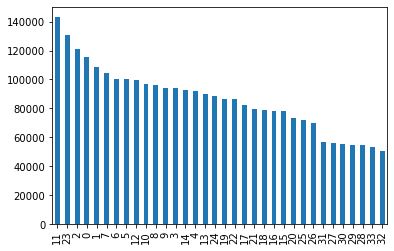

In [22]:
data['date_block_num'].value_counts().plot.bar()

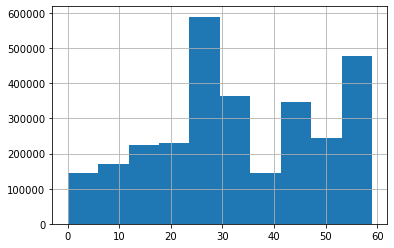

In [23]:
data['shop_id'].hist()

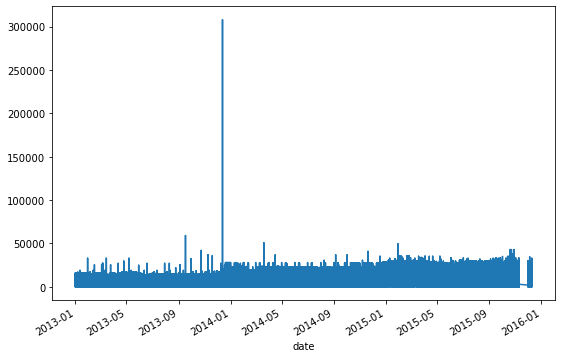

In [24]:
data['item_price'].plot(figsize=(9,6)) 
plt.show()

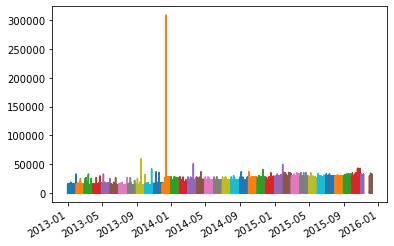

In [32]:
data['2013':'2015']['item_price'].resample('M').plot()
plt.show()

In [ ]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
data_monthly_max = data[data_columns].resample('M').max() # W stands for weekly
data_monthly_max

In [ ]:
plt.figure(figsize=(11,4), dpi= 80)
pd.plotting.autocorrelation_plot(data.loc['2013': '2016', 'item_price']);

In [5]:
# creating the first order differencing data
data_first_order_diff = data[data_columns].diff()

NameError: name 'data_columns' is not defined